In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline 

traemos los datos de github

In [2]:
url10 = 'https://raw.githubusercontent.com/MaximilianoVM/DATA-MINIG-2023-1/main/project/DATA/NORENS_AGEBS_10.csv'
url20 = 'https://raw.githubusercontent.com/MaximilianoVM/DATA-MINIG-2023-1/main/project/DATA/NORENS_AGEBS_20.csv'

ens10 = pd.read_csv(url10)
ens20 = pd.read_csv(url20)

In [3]:
ens10.head(2)

,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,0435,3632.0,325.0,9.617302,2.193333,1321.0,0.853016,3.352540,584.0,1241.0,419.0
1,044A,1539.0,224.0,9.569643,2.264286,549.0,0.750714,3.152143,254.0,478.0,135.0


# PREPARANDO DATOS PARA EL PROCEDIMIENTO

ordenamos por poblacion total 'P_TOTAL'

In [4]:
ens10 = ens10.sort_values(by='P_TOTAL', ascending=False).reset_index(drop=True)
ens20 = ens20.sort_values(by='P_TOTAL', ascending=False).reset_index(drop=True)


In [5]:
ens10.head(5)

,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,6006,5443.0,225.0,8.844595,2.155405,1581.0,0.993784,3.735405,624.0,1987.0,548.0
1,0435,3632.0,325.0,9.617302,2.193333,1321.0,0.853016,3.352540,584.0,1241.0,419.0
2,0524,3040.0,276.0,9.127049,2.500164,1083.0,0.816885,3.296066,497.0,1074.0,364.0
3,1005,2987.0,4.0,11.066000,1.524500,1228.0,0.829500,3.247000,423.0,1286.0,483.0
4,7714,2879.0,172.0,8.219375,2.270313,905.0,0.869375,3.345625,329.0,1057.0,367.0


quitamos AGEB para el clustering

In [6]:
ens10_vars = ens10.drop(columns='AGEB')
ens20_vars = ens20.drop(columns='AGEB')

In [7]:
ens10_vars.head(2)

,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,5443.0,225.0,8.844595,2.155405,1581.0,0.993784,3.735405,624.0,1987.0,548.0
1,3632.0,325.0,9.617302,2.193333,1321.0,0.853016,3.352540,584.0,1241.0,419.0


info

In [8]:
ens10_vars.describe()

,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000
mean,1958.545455,154.424242,10.133857,1.847100,726.030303,0.753368,3.038960,347.303030,717.00000,208.060606
std,956.946351,102.447252,1.871146,0.367036,309.561533,0.195327,0.408365,150.307286,350.00875,133.124223
min,557.000000,0.000000,6.204906,0.912826,281.000000,0.372609,1.648261,95.000000,271.00000,20.000000
25%,1303.000000,59.000000,9.127049,1.524500,542.000000,0.618846,2.876042,209.000000,471.00000,118.000000
50%,1774.000000,172.000000,10.083929,1.911667,679.000000,0.750714,3.057955,329.000000,680.00000,152.000000
75%,2367.000000,225.000000,11.066000,2.155405,903.000000,0.853016,3.293214,438.000000,873.00000,312.000000
max,5443.000000,325.000000,14.026154,2.500164,1581.000000,1.228039,3.735405,673.000000,1987.00000,548.000000


notamos que los datos varian muchisimo en rango entre si, vamos a normalizar de 0 a 1 

## Normalizamos

==> Min-Max Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalerMm = MinMaxScaler()

#10
normalizedMm_data10 = scalerMm.fit_transform(ens10_vars)
ens10_normMm = pd.DataFrame(normalizedMm_data10, columns=ens10_vars.columns)

#20
normalizedMm_data20 = scalerMm.fit_transform(ens20_vars)
ens20_normMm = pd.DataFrame(normalizedMm_data20, columns=ens20_vars.columns)


ens10_normMm.head(5)

,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,1.000000,0.692308,0.337502,0.782807,1.000000,0.726155,1.000000,0.915225,1.000000,1.000000
1,0.629349,1.000000,0.436298,0.806701,0.800000,0.561597,0.816560,0.846021,0.565268,0.755682
2,0.508187,0.849231,0.373616,1.000000,0.616923,0.519360,0.789502,0.695502,0.467949,0.651515
3,0.497339,0.012308,0.621524,0.385346,0.728462,0.534107,0.765993,0.567474,0.591492,0.876894
4,0.475235,0.529231,0.257564,0.855197,0.480000,0.580721,0.813247,0.404844,0.458042,0.657197


==> Z-Score Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scalerZ = StandardScaler()

normalizedZ_data10 = scalerZ.fit_transform(ens10_vars)
ens10_normZ = pd.DataFrame(normalizedZ_data10, columns=ens10_vars.columns)

normalizedZ_data20 = scalerZ.fit_transform(ens20_vars)
ens20_normZ = pd.DataFrame(normalizedZ_data20, columns=ens20_vars.columns)

ens10_normZ.head(3)

,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,3.697679,0.699580,-0.699706,0.853011,2.804695,1.249920,1.731890,1.869418,3.684740,2.593143
1,1.775858,1.690826,-0.280344,0.957949,1.951775,0.518068,0.779797,1.599170,1.520318,1.609098
2,1.147632,1.205115,-0.546413,1.806878,1.171025,0.330225,0.639359,1.011381,1.035789,1.189545


#CUSTERING

## cantidad optima de clusters? 

Codo de Jambú (Elbow Method)

In [11]:
wcss = []

for i in range(1, 16): 
  kmeans = KMeans(n_clusters=i , max_iter=300)
  #para esto solo necesitamos un censo
  kmeans.fit(ens10_normMm) #aplicamos kmeans al censo 2010
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

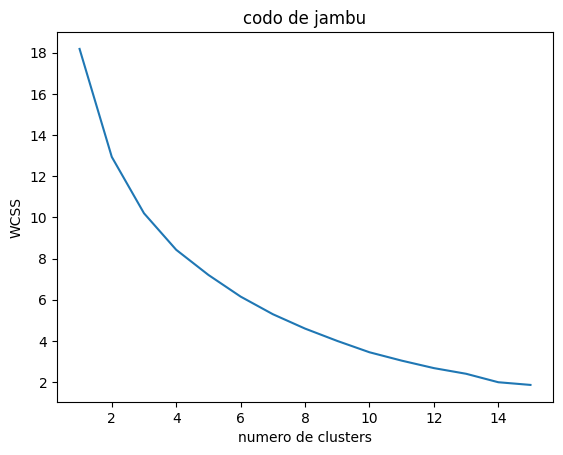

In [12]:
#graficando los resultados del wcss para formar el codo de jambu
plt.plot(range(1,16) , wcss)
plt.title('codo de jambu')
plt.xlabel('numero de clusters')
plt.ylabel('WCSS') #WCSS es un indicador de que tan similares son los individuos dentro de los clusters

plt.show()



## K-MEANS

utilizaremos 6 clusters, un poco por lo indicado con el codo de jambu, pero mas que nada porque en el articulo de referencia se divide la tipologia de AGEBS en 6

### al censo 2010

In [13]:
clustering10 = KMeans(n_clusters=6, max_iter=300) #crea el modelo
clustering10.fit(ens10_normMm) #aplica el metodo al censo 2010

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

agregamos la clasificacion al dataframe original de 2010 (ens10)

In [14]:
ens10['KMeans_Clusters'] = clustering10.labels_ #los resultados del clustering se guardan en labels_ dentro del modelo

ens10.head(3)

,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5,KMeans_Clusters
0,6006,5443.0,225.0,8.844595,2.155405,1581.0,0.993784,3.735405,624.0,1987.0,548.0,3
1,0435,3632.0,325.0,9.617302,2.193333,1321.0,0.853016,3.352540,584.0,1241.0,419.0,3
2,0524,3040.0,276.0,9.127049,2.500164,1083.0,0.816885,3.296066,497.0,1074.0,364.0,4


que agebs estan juntos ? 

In [15]:
#clust10 = ens10.pivot(columns='KMeans_Clusters', values='AGEB').fillna(0)

# Assuming you have a DataFrame called 'df'
cluster10_0 = ens10['AGEB'][ens10['KMeans_Clusters'] == 0].tolist()
cluster10_1 = ens10['AGEB'][ens10['KMeans_Clusters'] == 1].tolist()
cluster10_2 = ens10['AGEB'][ens10['KMeans_Clusters'] == 2].tolist()
cluster10_3 = ens10['AGEB'][ens10['KMeans_Clusters'] == 3].tolist()
cluster10_4 = ens10['AGEB'][ens10['KMeans_Clusters'] == 4].tolist()
cluster10_5 = ens10['AGEB'][ens10['KMeans_Clusters'] == 5].tolist()


### al censo 2020

In [16]:
clustering20 = KMeans(n_clusters=6, max_iter=300) #crea el modelo
clustering20.fit(ens20_normMm) #aplica el metodo al censo 2010

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

agregamos la clasificacion al dataframe original de 2020 (ens20)

In [17]:
ens20['KMeans_Clusters'] = clustering20.labels_ #los resultados del clustering se guardan en labels_ dentro del modelo

ens20.head(5)

,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5,KMeans_Clusters
0,6006,4685.0,397.0,9.555526,2.025000,1719.0,0.810000,3.088684,685.0,1327.0,435.0,3
1,0435,3798.0,457.0,10.768983,1.982203,1382.0,0.776610,3.137627,782.0,1273.0,259.0,3
2,1005,3611.0,121.0,11.394000,1.596000,1161.0,0.892667,3.397333,655.0,1379.0,386.0,5
3,7752,2940.0,326.0,10.683235,1.795882,1151.0,0.742941,2.949706,583.0,754.0,264.0,4
4,7714,2885.0,295.0,9.091176,1.963529,982.0,0.746765,2.886471,444.0,944.0,283.0,4


que agebs estan juntos?

In [18]:
# Assuming you have a DataFrame called 'df'
cluster20_0 = ens20['AGEB'][ens20['KMeans_Clusters'] == 0].tolist()
cluster20_1 = ens20['AGEB'][ens20['KMeans_Clusters'] == 1].tolist()
cluster20_2 = ens20['AGEB'][ens20['KMeans_Clusters'] == 2].tolist()
cluster20_3 = ens20['AGEB'][ens20['KMeans_Clusters'] == 3].tolist()
cluster20_4 = ens20['AGEB'][ens20['KMeans_Clusters'] == 4].tolist()
cluster20_5 = ens20['AGEB'][ens20['KMeans_Clusters'] == 5].tolist()


### visualizacion de clusters

Aplicaremos el analisis de componentes principales para darnos una idea de como se formaron los clusters

In [19]:
from sklearn.decomposition import PCA 

#### PCA

2010

In [20]:
pca = PCA(n_components=2)
pca_10 = pca.fit_transform(ens10_normMm)
pca_ens10 = pd.DataFrame(data = pca_10, columns = ['Componente_1', 'Componente_2'])
pca_agebs10 = pd.concat([ pca_ens10, ens10[['KMeans_Clusters']]], axis=1)

pca_agebs10.head()

,Componente_1,Componente_2,KMeans_Clusters
0,1.495080,-0.320437,3
1,1.034925,0.130298,3
2,0.755402,0.036821,4
3,0.444561,-0.449652,2
4,0.444655,-0.312054,4


2020

In [21]:
pca = PCA(n_components=2)
pca_20 = pca.fit_transform(ens20_normMm)
pca_ens20 = pd.DataFrame(data = pca_20, columns = ['Componente_1', 'Componente_2'])
pca_agebs20 = pd.concat([ pca_ens20, ens20[['KMeans_Clusters']]], axis=1)

pca_agebs20.head()

,Componente_1,Componente_2,KMeans_Clusters
0,1.439662,0.127247,3
1,1.072238,0.291060,3
2,1.056304,-0.165785,5
3,0.491182,0.085651,4
4,0.515551,-0.170837,4


#### visualizacion

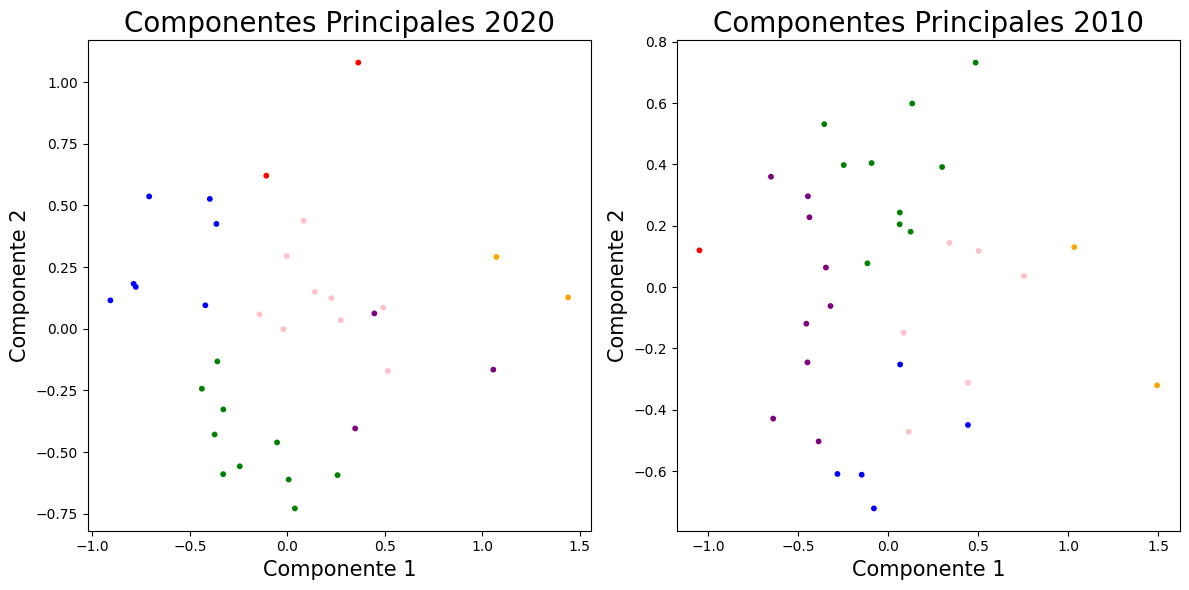

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
color_theme = np.array(["red", "green", "blue", "orange", "pink", "purple"])

# Plot for 2020
ax1.set_xlabel('Componente 1', fontsize=15)
ax1.set_ylabel('Componente 2', fontsize=15)
ax1.set_title('Componentes Principales 2020', fontsize=20)
ax1.scatter(x=pca_agebs20.Componente_1, y=pca_agebs20.Componente_2, c=color_theme[pca_agebs20.KMeans_Clusters], s=10)

# Plot for 2010
ax2.set_xlabel('Componente 1', fontsize=15)
ax2.set_ylabel('Componente 2', fontsize=15)
ax2.set_title('Componentes Principales 2010', fontsize=20)
ax2.scatter(x=pca_agebs10.Componente_1, y=pca_agebs10.Componente_2, c=color_theme[pca_agebs10.KMeans_Clusters], s=10)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

###comparacion

In [25]:
print('CLUSTERS 2010')
print('CLUSTER 0: ', cluster10_0)
print('CLUSTER 1: ', cluster10_1)
print('CLUSTER 2: ', cluster10_2)
print('CLUSTER 3: ', cluster10_3)
print('CLUSTER 4: ', cluster10_4)
print('CLUSTER 5: ', cluster10_5)


CLUSTERS 2010
CLUSTER 0:  ['0492']
CLUSTER 1:  ['0647', '0558', '0454', '7729', '7771', '7733', '0628', '0562', '044A', '0577']
CLUSTER 2:  ['1005', '1024', '1255', '7678', '101A']
CLUSTER 3:  ['6006', '0435']
CLUSTER 4:  ['0524', '7714', '7752', '7786', '7697', '0543']
CLUSTER 5:  ['7748', '6025', '7451', '7663', '770A', '7767', '0581', '8089', '0505']


In [26]:
print('CLUSTERS 2020')
print('CLUSTER 0: ', cluster20_0)
print('CLUSTER 1: ', cluster20_1)
print('CLUSTER 2: ', cluster20_2)
print('CLUSTER 3: ', cluster20_3)
print('CLUSTER 4: ', cluster20_4)
print('CLUSTER 5: ', cluster20_5)


CLUSTERS 2020
CLUSTER 0:  ['0647', '7771']
CLUSTER 1:  ['7697', '7678', '0543', '101A', '044A', '8089', '770A', '7663', '7451', '7767']
CLUSTER 2:  ['0628', '6025', '0562', '0577', '0581', '0492', '0505']
CLUSTER 3:  ['6006', '0435']
CLUSTER 4:  ['7752', '7714', '0524', '7786', '0558', '0454', '7729', '7733', '7748']
CLUSTER 5:  ['1005', '1024', '1255']
